In [1]:
import pandas as pd
import random
import alpaca_trade_api as tradeapi

In [2]:
alpaca = tradeapi.REST()

In [3]:
companies= ["IPHI","AMAT","SPWR","QCOM","ARW","MXIM","TXN","AMD","NVDA","LSCC","ENPH"]

In [4]:
df = alpaca.get_barset(companies, timeframe="day", limit=300).df

In [5]:
df.head()

AMAT                                       AMD  \
                            open   high    low  close      volume     open   
time                                                                         
2020-01-22 00:00:00-05:00  63.70  64.60  63.62  63.88   9882919.0      NaN   
2020-01-23 00:00:00-05:00  64.13  64.26  63.13  63.89  11489897.0      NaN   
2020-01-24 00:00:00-05:00  64.80  64.93  61.61  61.98  13992410.0  52.2803   
2020-01-27 00:00:00-05:00  59.95  60.45  58.82  59.03   7247210.0  48.4500   
2020-01-28 00:00:00-05:00  59.72  60.35  58.92  60.19   5066521.0  50.0300   

                                                               ...  SPWR  \
                            high    low    close       volume  ...  open   
time                                                           ...         
2020-01-22 00:00:00-05:00    NaN    NaN      NaN          NaN  ...   NaN   
2020-01-23 00:00:00-05:00    NaN    NaN      NaN          NaN  ...   NaN   
2020-01-24 00:00:00-05:00  52.81  49.47  50.3500  152893400.0  ...  9.10   
2020-01-27 00:00:00-05:00  49.79  47.90  49.2591   44712419.0  ...  8.50   
2020-01-28 00:00:00-05:00  50.85  49.48  50.5300   51267435.0  ...  8.47   

                                                           TXN          \
                           high   low close     volume    open    high   
time                                                                     
2020-01-22 00:00:00-05:00   NaN   NaN   NaN        NaN     NaN     NaN   
2020-01-23 00:00:00-05:00   NaN   NaN   NaN        NaN     NaN     NaN   
2020-01-24 00:00:00-05:00  9.18  8.65  8.78  5576709.0  134.80  135.44   
2020-01-27 00:00:00-05:00  8.51  8.20  8.38  2228056.0  128.65  129.25   
2020-01-28 00:00:00-05:00  8.72  8.44  8.65  1343904.0  127.15  128.31   

                                                      
                              low   close     volume  
time                                                  
2020-01-22 00:00:00-05:00     NaN     NaN        NaN  
2020-01-23 00:00:00-05:00     NaN     NaN        NaN  
2020-01-24 00:00:00-05:00  129.75  130.50  8775275.0  
2020-01-27 00:00:00-05:00  126.24  126.31  4805014.0  
2020-01-28 00:00:00-05:00  126.76  128.04  3317046.0  

[5 rows x 55 columns]

In [6]:
closes = df.xs("close", axis="columns", level=1)
closes.head()

,AMAT,AMD,ARW,ENPH,IPHI,LSCC,MXIM,NVDA,QCOM,SPWR,TXN
time,,,,,,,,,,,
2020-01-22 00:00:00-05:00,63.88,NaN,NaN,31.615,NaN,NaN,NaN,250.11,92.96,NaN,NaN
2020-01-23 00:00:00-05:00,63.89,NaN,NaN,32.070,84.13,NaN,NaN,252.79,91.96,NaN,NaN
2020-01-24 00:00:00-05:00,61.98,50.3500,81.52,32.710,82.99,21.70,62.56,250.55,89.64,8.78,130.50
2020-01-27 00:00:00-05:00,59.03,49.2591,79.28,29.950,80.14,20.85,60.29,240.18,87.05,8.38,126.31
2020-01-28 00:00:00-05:00,60.19,50.5300,79.76,32.230,80.28,21.19,62.16,248.00,89.15,8.65,128.04


In [7]:
returns = closes.pct_change().dropna()
returns.head()

,AMAT,AMD,ARW,ENPH,IPHI,LSCC,MXIM,NVDA,QCOM,SPWR,TXN
time,,,,,,,,,,,
2020-01-27 00:00:00-05:00,-0.047596,-0.021666,-0.027478,-0.084378,-0.034341,-0.039171,-0.036285,-0.041389,-0.028893,-0.045558,-0.032107
2020-01-28 00:00:00-05:00,0.019651,0.025800,0.006054,0.076127,0.001747,0.016307,0.031017,0.032559,0.024124,0.032220,0.013696
2020-01-29 00:00:00-05:00,-0.006147,-0.059766,-0.008149,0.009929,0.003363,-0.012270,-0.010216,-0.009919,-0.010432,0.000000,-0.020072
2020-01-30 00:00:00-05:00,0.006369,0.026312,-0.006826,0.028396,-0.016015,-0.042045,0.008533,0.001100,-0.004988,0.009249,-0.008289
2020-01-31 00:00:00-05:00,-0.036727,-0.036712,-0.033855,-0.058382,-0.041509,-0.071820,-0.030943,-0.038078,-0.028708,-0.022910,-0.030539


In [ ]:
my_list = []
for value in range(11):
    mylist.append(random.random())

In [18]:
preweights = [random.random() for w in range(11)]
weightsum = sum(preweights)
weights = [w/weightsum for w in preweights]

In [19]:
weights

[0.18217027829258634,
 0.002132967758678835,
 0.041762813196782676,
 0.12961530374769048,
 0.14959503660085124,
 0.12318932098471773,
 0.06554930772490075,
 0.04621484377985839,
 0.02298076164411785,
 0.051238899473185585,
 0.1855504667966301]

<AxesSubplot:xlabel='time'>

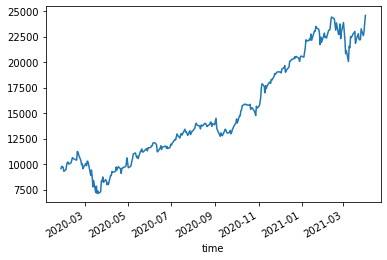

In [20]:
initial = 10000
portfolio_returns = returns.dot(weights)
cumulative_returns = (1+portfolio_returns).cumprod()
(initial*cumulative_returns).plot()

In [24]:
results = pd.DataFrame({
    "Weights":[],
    "Total_Return":[],
    "Risk":[],
    "Sharpe":[]
})

trials = 3000
risk_free_rate = .017

for trial in range(trials):

    # randomly generate weights
    preweights = [random.random() for w in range(11)]
    weightsum = sum(preweights)
    weights = [w/weightsum for w in preweights]

    # calc returns for random portfolio
    initial = 10000
    portfolio_returns = returns.dot(weights)
    cumulative_returns = (1+portfolio_returns).cumprod()
    # (initial*cumulative_returns).plot()

    risk = portfolio_returns.std()
    total_return = cumulative_returns[-1]

    results = results.append({
        "Weights": weights,
        "Total_Return": total_return,
        "Risk": risk,
        "Sharpe": (total_return)/risk
    }, ignore_index=True)


results.head()

,Weights,Total_Return,Risk,Sharpe
0,"[0.0901702653639491, 0.10621895766580318, 0.10...",2.562808,0.033237,76.594967
1,"[0.010835320803417618, 0.10839972413364415, 0....",1.826398,0.027081,66.814791
2,"[0.03663592929853584, 0.038033034419520335, 0....",2.090063,0.029709,69.778646
3,"[0.001455439233481161, 0.10097929589782623, 0....",2.465776,0.032395,75.590739
4,"[0.09047917531514416, 0.014003787248273327, 0....",2.266197,0.030110,74.698436


<AxesSubplot:xlabel='Risk', ylabel='Total_Return'>

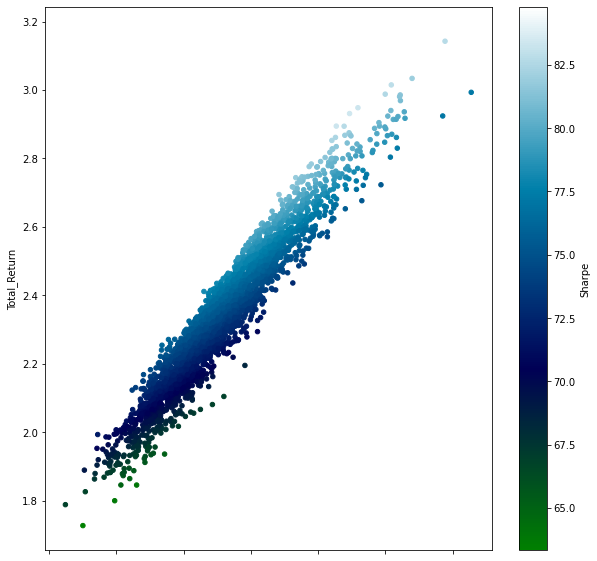

In [29]:
results.plot(
    kind="scatter",
    x="Risk",
    y="Total_Return",
    c="Sharpe",
    colormap="ocean",
    figsize=(10,10)
)

In [33]:
results[results["Sharpe"]>83]

,Weights,Total_Return,Risk,Sharpe
1722,"[0.028430782339848904, 0.028714333034026106, 0...",2.948100,0.035182,83.313540
1882,"[0.024323258236616106, 0.04724886436698557, 0....",2.894436,0.034538,83.311776
2085,"[0.02133900858382754, 0.01751728288044572, 0.0...",3.171077,0.037196,84.795908
2105,"[0.11533292887157387, 0.07669549092383544, 0.0...",2.931101,0.034933,83.420129
